In [36]:
import pandas as pd

In [37]:
import tensorflow as tf

In [39]:
rating_data = pd.read_csv('final_data2.csv')
rating_data['side_info_user'] = rating_data['energy_consumption_perday']

rating_data['side_info_item'] = rating_data['volume(kwh)']







In [40]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(n_splits=3,shuffle=False)

X=rating_data[['user_id','battery_id','side_info_user','side_info_item']]
Y=rating_data[['rating']]

for train_ind,test_ind in kfold.split(X):
    print('fold')
    print(train_ind,test_ind)
    train_x=X.iloc[train_ind]
    train_y=Y.iloc[train_ind]
    
    test_x=X.iloc[test_ind]
    test_y=Y.iloc[test_ind]
    
    #model fit(x_train,y_train)
    #model valid(test_x,test_y)
    
    

fold
[203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346
 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364
 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382
 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400
 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 4

In [40]:
X.loc[[1,2,5]]

,user_id,battery_id,side_info_user,side_info_item
1,42,27,0.059271,0.536313
2,41,27,0.020238,0.536313
5,132,27,0.394683,0.536313


In [13]:
rating_data['user_id'][x_ind]

0      134
1       42
2       41
3      120
4        5
      ... 
401     98
402    100
403     87
404     95
405     47
Name: user_id, Length: 406, dtype: int64

In [14]:
rating_data['user_id']

0      134
1       42
2       41
3      120
4        5
      ... 
603    127
604     81
605    121
606    108
607    133
Name: user_id, Length: 608, dtype: int64

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Input,Model
from tensorflow.keras.layers import Embedding,Flatten,Dropout,Dot,Dense
from tensorflow.keras.optimizers import Adam

latent_factors = 5

In [16]:

user_input = Input(shape=(1,),name='user_input', dtype='int32')
user_embedding = Embedding(151, latent_factors, name='user_embedding')(user_input)
user_flat = Flatten(name='user_flat')(user_embedding)
user_flat = Dropout(0.3)(user_flat)

In [17]:
movie_input = Input(shape=(1,),name='movie_input', dtype='int32')
movie_embedding = Embedding(40, latent_factors, name='movie_embedding')(movie_input)
movie_flat = Flatten(name='movie_flat')(movie_embedding)
movie_flat = Dropout(0.3)(movie_flat)

In [18]:
user_flat,movie_flat



(<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dropout_2')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dropout_3')>)

In [54]:
product = layers.concatenate([user_flat, movie_flat], name='product')

product

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'product')>

In [55]:
dense1 = Dense(512, activation='relu')(product)
dense1 = Dropout(0.3)(dense1)
dense2 = Dense(256, activation='relu')(dense1)
dense2 = Dropout(0.3)(dense2)
dense3 = Dense(128, activation='relu')(dense2)
dense3 = Dropout(0.3)(dense3)
dense4 = Dense(64, activation='relu')(dense3)
dense_out = Dense(1, activation='relu')(dense4)

In [56]:
model1 = Model([user_input, movie_input], dense_out)

In [57]:
learning_rate = 0.00005
epochs = 1000
batch_size = 64

In [58]:
model1.compile(optimizer=Adam(lr=learning_rate), loss='mse', 
               metrics=[tf.keras.metrics.RootMeanSquaredError(), 
                        tf.keras.metrics.MeanAbsoluteError()])

In [59]:
fit = model1.fit([X['user_id'], X['battery_id']], Y,
                batch_size=batch_size,
                epochs=epochs,
                shuffle=True, 
                validation_split=0.25)

Epoch 1/1000
8/8 [==============================] - 1s 31ms/step - loss: 9.9306 - root_mean_squared_error: 3.1510 - mean_absolute_error: 2.8673 - val_loss: 9.1311 - val_root_mean_squared_error: 3.0218 - val_mean_absolute_error: 2.6317
Epoch 2/1000
8/8 [==============================] - 0s 11ms/step - loss: 9.8754 - root_mean_squared_error: 3.1425 - mean_absolute_error: 2.8554 - val_loss: 9.0814 - val_root_mean_squared_error: 3.0135 - val_mean_absolute_error: 2.6221
Epoch 3/1000
8/8 [==============================] - 0s 11ms/step - loss: 9.4612 - root_mean_squared_error: 3.0755 - mean_absolute_error: 2.7953 - val_loss: 9.0246 - val_root_mean_squared_error: 3.0041 - val_mean_absolute_error: 2.6112
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 9.7704 - root_mean_squared_error: 3.1256 - mean_absolute_error: 2.8435 - val_loss: 8.9586 - val_root_mean_squared_error: 2.9931 - val_mean_absolute_error: 2.5983
Epoch 5/1000
8/8 [==============================] - 0s 10ms/

Epoch 36/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.7465 - root_mean_squared_error: 1.3214 - mean_absolute_error: 1.1022 - val_loss: 2.3116 - val_root_mean_squared_error: 1.5204 - val_mean_absolute_error: 1.3293
Epoch 37/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.7170 - root_mean_squared_error: 1.3103 - mean_absolute_error: 1.0882 - val_loss: 2.3156 - val_root_mean_squared_error: 1.5217 - val_mean_absolute_error: 1.3280
Epoch 38/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.7005 - root_mean_squared_error: 1.3039 - mean_absolute_error: 1.0874 - val_loss: 2.3216 - val_root_mean_squared_error: 1.5237 - val_mean_absolute_error: 1.3256
Epoch 39/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.7445 - root_mean_squared_error: 1.3206 - mean_absolute_error: 1.1137 - val_loss: 2.3275 - val_root_mean_squared_error: 1.5256 - val_mean_absolute_error: 1.3231
Epoch 40/1000
8/8 [==============================] - 0s 8ms/

Epoch 71/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.6353 - root_mean_squared_error: 1.2788 - mean_absolute_error: 1.0552 - val_loss: 2.3750 - val_root_mean_squared_error: 1.5411 - val_mean_absolute_error: 1.3242
Epoch 72/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.6151 - root_mean_squared_error: 1.2704 - mean_absolute_error: 1.0627 - val_loss: 2.3789 - val_root_mean_squared_error: 1.5424 - val_mean_absolute_error: 1.3229
Epoch 73/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.6342 - root_mean_squared_error: 1.2782 - mean_absolute_error: 1.0756 - val_loss: 2.3724 - val_root_mean_squared_error: 1.5403 - val_mean_absolute_error: 1.3264
Epoch 74/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.5469 - root_mean_squared_error: 1.2437 - mean_absolute_error: 1.0364 - val_loss: 2.3721 - val_root_mean_squared_error: 1.5402 - val_mean_absolute_error: 1.3274
Epoch 75/1000
8/8 [==============================] - 0s 

Epoch 106/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.4392 - root_mean_squared_error: 1.1990 - mean_absolute_error: 0.9964 - val_loss: 2.4053 - val_root_mean_squared_error: 1.5509 - val_mean_absolute_error: 1.3372
Epoch 107/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.4095 - root_mean_squared_error: 1.1871 - mean_absolute_error: 0.9869 - val_loss: 2.4097 - val_root_mean_squared_error: 1.5523 - val_mean_absolute_error: 1.3362
Epoch 108/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.5284 - root_mean_squared_error: 1.2362 - mean_absolute_error: 1.0158 - val_loss: 2.4096 - val_root_mean_squared_error: 1.5523 - val_mean_absolute_error: 1.3378
Epoch 109/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.4400 - root_mean_squared_error: 1.1997 - mean_absolute_error: 1.0051 - val_loss: 2.4131 - val_root_mean_squared_error: 1.5534 - val_mean_absolute_error: 1.3370
Epoch 110/1000
8/8 [==============================] - 0s

Epoch 141/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.2779 - root_mean_squared_error: 1.1303 - mean_absolute_error: 0.9314 - val_loss: 2.4848 - val_root_mean_squared_error: 1.5763 - val_mean_absolute_error: 1.3542
Epoch 142/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.2666 - root_mean_squared_error: 1.1253 - mean_absolute_error: 0.9202 - val_loss: 2.4907 - val_root_mean_squared_error: 1.5782 - val_mean_absolute_error: 1.3510
Epoch 143/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.2785 - root_mean_squared_error: 1.1299 - mean_absolute_error: 0.9188 - val_loss: 2.4988 - val_root_mean_squared_error: 1.5807 - val_mean_absolute_error: 1.3476
Epoch 144/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.1558 - root_mean_squared_error: 1.0739 - mean_absolute_error: 0.8636 - val_loss: 2.5000 - val_root_mean_squared_error: 1.5811 - val_mean_absolute_error: 1.3479
Epoch 145/1000
8/8 [==============================] -

Epoch 176/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.0915 - root_mean_squared_error: 1.0445 - mean_absolute_error: 0.8463 - val_loss: 2.5251 - val_root_mean_squared_error: 1.5891 - val_mean_absolute_error: 1.3536
Epoch 177/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.0841 - root_mean_squared_error: 1.0410 - mean_absolute_error: 0.8556 - val_loss: 2.5266 - val_root_mean_squared_error: 1.5895 - val_mean_absolute_error: 1.3547
Epoch 178/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.9682 - root_mean_squared_error: 0.9839 - mean_absolute_error: 0.7772 - val_loss: 2.5413 - val_root_mean_squared_error: 1.5941 - val_mean_absolute_error: 1.3533
Epoch 179/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.0930 - root_mean_squared_error: 1.0451 - mean_absolute_error: 0.8205 - val_loss: 2.5375 - val_root_mean_squared_error: 1.5929 - val_mean_absolute_error: 1.3549
Epoch 180/1000
8/8 [==============================] - 0s

Epoch 211/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.9059 - root_mean_squared_error: 0.9509 - mean_absolute_error: 0.7481 - val_loss: 2.5358 - val_root_mean_squared_error: 1.5924 - val_mean_absolute_error: 1.3543
Epoch 212/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.9261 - root_mean_squared_error: 0.9612 - mean_absolute_error: 0.7552 - val_loss: 2.5338 - val_root_mean_squared_error: 1.5918 - val_mean_absolute_error: 1.3573
Epoch 213/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.9354 - root_mean_squared_error: 0.9670 - mean_absolute_error: 0.7664 - val_loss: 2.5298 - val_root_mean_squared_error: 1.5905 - val_mean_absolute_error: 1.3655
Epoch 214/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.9195 - root_mean_squared_error: 0.9588 - mean_absolute_error: 0.7557 - val_loss: 2.5274 - val_root_mean_squared_error: 1.5898 - val_mean_absolute_error: 1.3626
Epoch 215/1000
8/8 [==============================] - 0s

Epoch 246/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.7579 - root_mean_squared_error: 0.8705 - mean_absolute_error: 0.6873 - val_loss: 2.5403 - val_root_mean_squared_error: 1.5938 - val_mean_absolute_error: 1.3619
Epoch 247/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.8357 - root_mean_squared_error: 0.9136 - mean_absolute_error: 0.7059 - val_loss: 2.5401 - val_root_mean_squared_error: 1.5938 - val_mean_absolute_error: 1.3617
Epoch 248/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.8397 - root_mean_squared_error: 0.9162 - mean_absolute_error: 0.7126 - val_loss: 2.5380 - val_root_mean_squared_error: 1.5931 - val_mean_absolute_error: 1.3595
Epoch 249/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.8255 - root_mean_squared_error: 0.9078 - mean_absolute_error: 0.6974 - val_loss: 2.5318 - val_root_mean_squared_error: 1.5912 - val_mean_absolute_error: 1.3626
Epoch 250/1000
8/8 [==============================] - 

Epoch 281/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.7947 - root_mean_squared_error: 0.8914 - mean_absolute_error: 0.7005 - val_loss: 2.5015 - val_root_mean_squared_error: 1.5816 - val_mean_absolute_error: 1.3516
Epoch 282/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.8691 - root_mean_squared_error: 0.9320 - mean_absolute_error: 0.7375 - val_loss: 2.5012 - val_root_mean_squared_error: 1.5815 - val_mean_absolute_error: 1.3579
Epoch 283/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.7025 - root_mean_squared_error: 0.8376 - mean_absolute_error: 0.6401 - val_loss: 2.5057 - val_root_mean_squared_error: 1.5829 - val_mean_absolute_error: 1.3639
Epoch 284/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.7985 - root_mean_squared_error: 0.8933 - mean_absolute_error: 0.7009 - val_loss: 2.5067 - val_root_mean_squared_error: 1.5832 - val_mean_absolute_error: 1.3644
Epoch 285/1000
8/8 [==============================] 

Epoch 316/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.7711 - root_mean_squared_error: 0.8774 - mean_absolute_error: 0.6910 - val_loss: 2.5245 - val_root_mean_squared_error: 1.5889 - val_mean_absolute_error: 1.3720
Epoch 317/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.7302 - root_mean_squared_error: 0.8535 - mean_absolute_error: 0.6530 - val_loss: 2.5133 - val_root_mean_squared_error: 1.5853 - val_mean_absolute_error: 1.3657
Epoch 318/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.7590 - root_mean_squared_error: 0.8708 - mean_absolute_error: 0.6911 - val_loss: 2.5056 - val_root_mean_squared_error: 1.5829 - val_mean_absolute_error: 1.3620
Epoch 319/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.8075 - root_mean_squared_error: 0.8983 - mean_absolute_error: 0.6865 - val_loss: 2.5008 - val_root_mean_squared_error: 1.5814 - val_mean_absolute_error: 1.3581
Epoch 320/1000
8/8 [==============================] - 0

Epoch 351/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.7057 - root_mean_squared_error: 0.8399 - mean_absolute_error: 0.6683 - val_loss: 2.4893 - val_root_mean_squared_error: 1.5778 - val_mean_absolute_error: 1.3464
Epoch 352/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.7291 - root_mean_squared_error: 0.8536 - mean_absolute_error: 0.6495 - val_loss: 2.4904 - val_root_mean_squared_error: 1.5781 - val_mean_absolute_error: 1.3538
Epoch 353/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6454 - root_mean_squared_error: 0.8022 - mean_absolute_error: 0.6227 - val_loss: 2.5046 - val_root_mean_squared_error: 1.5826 - val_mean_absolute_error: 1.3640
Epoch 354/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.7982 - root_mean_squared_error: 0.8932 - mean_absolute_error: 0.6932 - val_loss: 2.5193 - val_root_mean_squared_error: 1.5872 - val_mean_absolute_error: 1.3717
Epoch 355/1000
8/8 [==============================] -

Epoch 386/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6274 - root_mean_squared_error: 0.7917 - mean_absolute_error: 0.6203 - val_loss: 2.4830 - val_root_mean_squared_error: 1.5757 - val_mean_absolute_error: 1.3624
Epoch 387/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6739 - root_mean_squared_error: 0.8208 - mean_absolute_error: 0.6510 - val_loss: 2.4903 - val_root_mean_squared_error: 1.5781 - val_mean_absolute_error: 1.3668
Epoch 388/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.7356 - root_mean_squared_error: 0.8573 - mean_absolute_error: 0.6626 - val_loss: 2.4906 - val_root_mean_squared_error: 1.5782 - val_mean_absolute_error: 1.3665
Epoch 389/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6577 - root_mean_squared_error: 0.8107 - mean_absolute_error: 0.6324 - val_loss: 2.4801 - val_root_mean_squared_error: 1.5748 - val_mean_absolute_error: 1.3593
Epoch 390/1000
8/8 [==============================] - 0s

Epoch 421/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6957 - root_mean_squared_error: 0.8340 - mean_absolute_error: 0.6521 - val_loss: 2.5007 - val_root_mean_squared_error: 1.5814 - val_mean_absolute_error: 1.3647
Epoch 422/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.7299 - root_mean_squared_error: 0.8541 - mean_absolute_error: 0.6818 - val_loss: 2.4946 - val_root_mean_squared_error: 1.5794 - val_mean_absolute_error: 1.3598
Epoch 423/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.7421 - root_mean_squared_error: 0.8610 - mean_absolute_error: 0.6607 - val_loss: 2.4915 - val_root_mean_squared_error: 1.5785 - val_mean_absolute_error: 1.3572
Epoch 424/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6532 - root_mean_squared_error: 0.8072 - mean_absolute_error: 0.6255 - val_loss: 2.4869 - val_root_mean_squared_error: 1.5770 - val_mean_absolute_error: 1.3536
Epoch 425/1000
8/8 [==============================] - 0s

Epoch 456/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6633 - root_mean_squared_error: 0.8140 - mean_absolute_error: 0.6403 - val_loss: 2.4839 - val_root_mean_squared_error: 1.5760 - val_mean_absolute_error: 1.3623
Epoch 457/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6488 - root_mean_squared_error: 0.8051 - mean_absolute_error: 0.6151 - val_loss: 2.4745 - val_root_mean_squared_error: 1.5731 - val_mean_absolute_error: 1.3533
Epoch 458/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6579 - root_mean_squared_error: 0.8096 - mean_absolute_error: 0.6130 - val_loss: 2.4808 - val_root_mean_squared_error: 1.5750 - val_mean_absolute_error: 1.3584
Epoch 459/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.7402 - root_mean_squared_error: 0.8600 - mean_absolute_error: 0.6692 - val_loss: 2.4806 - val_root_mean_squared_error: 1.5750 - val_mean_absolute_error: 1.3598
Epoch 460/1000
8/8 [==============================] - 

Epoch 491/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.7240 - root_mean_squared_error: 0.8498 - mean_absolute_error: 0.6528 - val_loss: 2.4730 - val_root_mean_squared_error: 1.5726 - val_mean_absolute_error: 1.3624
Epoch 492/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6748 - root_mean_squared_error: 0.8206 - mean_absolute_error: 0.6283 - val_loss: 2.4785 - val_root_mean_squared_error: 1.5743 - val_mean_absolute_error: 1.3643
Epoch 493/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.8033 - root_mean_squared_error: 0.8916 - mean_absolute_error: 0.6815 - val_loss: 2.4717 - val_root_mean_squared_error: 1.5722 - val_mean_absolute_error: 1.3569
Epoch 494/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.7091 - root_mean_squared_error: 0.8420 - mean_absolute_error: 0.6599 - val_loss: 2.4716 - val_root_mean_squared_error: 1.5721 - val_mean_absolute_error: 1.3574
Epoch 495/1000
8/8 [==============================] - 0

Epoch 526/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.7358 - root_mean_squared_error: 0.8561 - mean_absolute_error: 0.6595 - val_loss: 2.4596 - val_root_mean_squared_error: 1.5683 - val_mean_absolute_error: 1.3600
Epoch 527/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6960 - root_mean_squared_error: 0.8341 - mean_absolute_error: 0.6408 - val_loss: 2.4613 - val_root_mean_squared_error: 1.5688 - val_mean_absolute_error: 1.3620
Epoch 528/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6348 - root_mean_squared_error: 0.7967 - mean_absolute_error: 0.6277 - val_loss: 2.4545 - val_root_mean_squared_error: 1.5667 - val_mean_absolute_error: 1.3570
Epoch 529/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6020 - root_mean_squared_error: 0.7731 - mean_absolute_error: 0.6027 - val_loss: 2.4572 - val_root_mean_squared_error: 1.5676 - val_mean_absolute_error: 1.3553
Epoch 530/1000
8/8 [==============================] - 0

Epoch 561/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6964 - root_mean_squared_error: 0.8339 - mean_absolute_error: 0.6354 - val_loss: 2.4574 - val_root_mean_squared_error: 1.5676 - val_mean_absolute_error: 1.3536
Epoch 562/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5495 - root_mean_squared_error: 0.7395 - mean_absolute_error: 0.5669 - val_loss: 2.4716 - val_root_mean_squared_error: 1.5721 - val_mean_absolute_error: 1.3621
Epoch 563/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6826 - root_mean_squared_error: 0.8237 - mean_absolute_error: 0.6316 - val_loss: 2.4963 - val_root_mean_squared_error: 1.5800 - val_mean_absolute_error: 1.3737
Epoch 564/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5846 - root_mean_squared_error: 0.7643 - mean_absolute_error: 0.5933 - val_loss: 2.4792 - val_root_mean_squared_error: 1.5745 - val_mean_absolute_error: 1.3629
Epoch 565/1000
8/8 [==============================] - 0s

Epoch 596/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6168 - root_mean_squared_error: 0.7849 - mean_absolute_error: 0.6013 - val_loss: 2.4870 - val_root_mean_squared_error: 1.5770 - val_mean_absolute_error: 1.3634
Epoch 597/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6339 - root_mean_squared_error: 0.7961 - mean_absolute_error: 0.6057 - val_loss: 2.4837 - val_root_mean_squared_error: 1.5760 - val_mean_absolute_error: 1.3630
Epoch 598/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5881 - root_mean_squared_error: 0.7665 - mean_absolute_error: 0.5818 - val_loss: 2.4738 - val_root_mean_squared_error: 1.5728 - val_mean_absolute_error: 1.3580
Epoch 599/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6475 - root_mean_squared_error: 0.8043 - mean_absolute_error: 0.6328 - val_loss: 2.4744 - val_root_mean_squared_error: 1.5730 - val_mean_absolute_error: 1.3572
Epoch 600/1000
8/8 [==============================] - 0s

Epoch 631/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6242 - root_mean_squared_error: 0.7898 - mean_absolute_error: 0.6153 - val_loss: 2.4519 - val_root_mean_squared_error: 1.5659 - val_mean_absolute_error: 1.3515
Epoch 632/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6610 - root_mean_squared_error: 0.8125 - mean_absolute_error: 0.6213 - val_loss: 2.4489 - val_root_mean_squared_error: 1.5649 - val_mean_absolute_error: 1.3524
Epoch 633/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5655 - root_mean_squared_error: 0.7514 - mean_absolute_error: 0.5807 - val_loss: 2.4797 - val_root_mean_squared_error: 1.5747 - val_mean_absolute_error: 1.3709
Epoch 634/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5153 - root_mean_squared_error: 0.7178 - mean_absolute_error: 0.5530 - val_loss: 2.5039 - val_root_mean_squared_error: 1.5824 - val_mean_absolute_error: 1.3811
Epoch 635/1000
8/8 [==============================] - 0s

Epoch 666/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5493 - root_mean_squared_error: 0.7409 - mean_absolute_error: 0.5642 - val_loss: 2.4983 - val_root_mean_squared_error: 1.5806 - val_mean_absolute_error: 1.3714
Epoch 667/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.4994 - root_mean_squared_error: 0.7055 - mean_absolute_error: 0.5307 - val_loss: 2.4905 - val_root_mean_squared_error: 1.5781 - val_mean_absolute_error: 1.3670
Epoch 668/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5414 - root_mean_squared_error: 0.7357 - mean_absolute_error: 0.5866 - val_loss: 2.4847 - val_root_mean_squared_error: 1.5763 - val_mean_absolute_error: 1.3618
Epoch 669/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5755 - root_mean_squared_error: 0.7585 - mean_absolute_error: 0.5711 - val_loss: 2.4860 - val_root_mean_squared_error: 1.5767 - val_mean_absolute_error: 1.3633
Epoch 670/1000
8/8 [==============================] - 0s

Epoch 701/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5795 - root_mean_squared_error: 0.7610 - mean_absolute_error: 0.5989 - val_loss: 2.4786 - val_root_mean_squared_error: 1.5744 - val_mean_absolute_error: 1.3654
Epoch 702/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6047 - root_mean_squared_error: 0.7772 - mean_absolute_error: 0.6052 - val_loss: 2.4669 - val_root_mean_squared_error: 1.5706 - val_mean_absolute_error: 1.3582
Epoch 703/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5814 - root_mean_squared_error: 0.7620 - mean_absolute_error: 0.5768 - val_loss: 2.4763 - val_root_mean_squared_error: 1.5736 - val_mean_absolute_error: 1.3652
Epoch 704/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5934 - root_mean_squared_error: 0.7701 - mean_absolute_error: 0.5891 - val_loss: 2.4784 - val_root_mean_squared_error: 1.5743 - val_mean_absolute_error: 1.3664
Epoch 705/1000
8/8 [==============================] - 0s

Epoch 736/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5462 - root_mean_squared_error: 0.7389 - mean_absolute_error: 0.5783 - val_loss: 2.4683 - val_root_mean_squared_error: 1.5711 - val_mean_absolute_error: 1.3668
Epoch 737/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6201 - root_mean_squared_error: 0.7873 - mean_absolute_error: 0.5987 - val_loss: 2.4938 - val_root_mean_squared_error: 1.5792 - val_mean_absolute_error: 1.3792
Epoch 738/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6805 - root_mean_squared_error: 0.8233 - mean_absolute_error: 0.6471 - val_loss: 2.4678 - val_root_mean_squared_error: 1.5709 - val_mean_absolute_error: 1.3661
Epoch 739/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6288 - root_mean_squared_error: 0.7929 - mean_absolute_error: 0.5947 - val_loss: 2.4469 - val_root_mean_squared_error: 1.5643 - val_mean_absolute_error: 1.3523
Epoch 740/1000
8/8 [==============================] - 0s

Epoch 771/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5254 - root_mean_squared_error: 0.7248 - mean_absolute_error: 0.5524 - val_loss: 2.5075 - val_root_mean_squared_error: 1.5835 - val_mean_absolute_error: 1.3760
Epoch 772/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6352 - root_mean_squared_error: 0.7962 - mean_absolute_error: 0.6047 - val_loss: 2.4856 - val_root_mean_squared_error: 1.5766 - val_mean_absolute_error: 1.3667
Epoch 773/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6047 - root_mean_squared_error: 0.7771 - mean_absolute_error: 0.5743 - val_loss: 2.4627 - val_root_mean_squared_error: 1.5693 - val_mean_absolute_error: 1.3529
Epoch 774/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5814 - root_mean_squared_error: 0.7623 - mean_absolute_error: 0.5838 - val_loss: 2.4582 - val_root_mean_squared_error: 1.5679 - val_mean_absolute_error: 1.3502
Epoch 775/1000
8/8 [==============================] - 0s

Epoch 806/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5311 - root_mean_squared_error: 0.7280 - mean_absolute_error: 0.5637 - val_loss: 2.4682 - val_root_mean_squared_error: 1.5710 - val_mean_absolute_error: 1.3605
Epoch 807/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5159 - root_mean_squared_error: 0.7170 - mean_absolute_error: 0.5475 - val_loss: 2.4623 - val_root_mean_squared_error: 1.5692 - val_mean_absolute_error: 1.3578
Epoch 808/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5436 - root_mean_squared_error: 0.7369 - mean_absolute_error: 0.5647 - val_loss: 2.4431 - val_root_mean_squared_error: 1.5630 - val_mean_absolute_error: 1.3472
Epoch 809/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6266 - root_mean_squared_error: 0.7914 - mean_absolute_error: 0.5990 - val_loss: 2.4526 - val_root_mean_squared_error: 1.5661 - val_mean_absolute_error: 1.3535
Epoch 810/1000
8/8 [==============================] - 0s

Epoch 841/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5052 - root_mean_squared_error: 0.7107 - mean_absolute_error: 0.5384 - val_loss: 2.4392 - val_root_mean_squared_error: 1.5618 - val_mean_absolute_error: 1.3517
Epoch 842/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5701 - root_mean_squared_error: 0.7546 - mean_absolute_error: 0.5961 - val_loss: 2.4479 - val_root_mean_squared_error: 1.5646 - val_mean_absolute_error: 1.3563
Epoch 843/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5204 - root_mean_squared_error: 0.7208 - mean_absolute_error: 0.5454 - val_loss: 2.4517 - val_root_mean_squared_error: 1.5658 - val_mean_absolute_error: 1.3583
Epoch 844/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5341 - root_mean_squared_error: 0.7306 - mean_absolute_error: 0.5616 - val_loss: 2.4609 - val_root_mean_squared_error: 1.5687 - val_mean_absolute_error: 1.3630
Epoch 845/1000
8/8 [==============================] - 0s

Epoch 876/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.4982 - root_mean_squared_error: 0.7053 - mean_absolute_error: 0.5419 - val_loss: 2.4517 - val_root_mean_squared_error: 1.5658 - val_mean_absolute_error: 1.3542
Epoch 877/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5913 - root_mean_squared_error: 0.7687 - mean_absolute_error: 0.5728 - val_loss: 2.4575 - val_root_mean_squared_error: 1.5677 - val_mean_absolute_error: 1.3573
Epoch 878/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5768 - root_mean_squared_error: 0.7589 - mean_absolute_error: 0.5918 - val_loss: 2.4639 - val_root_mean_squared_error: 1.5697 - val_mean_absolute_error: 1.3612
Epoch 879/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5264 - root_mean_squared_error: 0.7252 - mean_absolute_error: 0.5459 - val_loss: 2.4665 - val_root_mean_squared_error: 1.5705 - val_mean_absolute_error: 1.3623
Epoch 880/1000
8/8 [==============================] - 0s

Epoch 911/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5681 - root_mean_squared_error: 0.7536 - mean_absolute_error: 0.5663 - val_loss: 2.4565 - val_root_mean_squared_error: 1.5673 - val_mean_absolute_error: 1.3562
Epoch 912/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6296 - root_mean_squared_error: 0.7927 - mean_absolute_error: 0.5969 - val_loss: 2.4559 - val_root_mean_squared_error: 1.5671 - val_mean_absolute_error: 1.3535
Epoch 913/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5008 - root_mean_squared_error: 0.7060 - mean_absolute_error: 0.5399 - val_loss: 2.4553 - val_root_mean_squared_error: 1.5669 - val_mean_absolute_error: 1.3541
Epoch 914/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.4939 - root_mean_squared_error: 0.7022 - mean_absolute_error: 0.5362 - val_loss: 2.4461 - val_root_mean_squared_error: 1.5640 - val_mean_absolute_error: 1.3521
Epoch 915/1000
8/8 [==============================] - 0s

Epoch 946/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.4884 - root_mean_squared_error: 0.6967 - mean_absolute_error: 0.5394 - val_loss: 2.4304 - val_root_mean_squared_error: 1.5590 - val_mean_absolute_error: 1.3476
Epoch 947/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5505 - root_mean_squared_error: 0.7415 - mean_absolute_error: 0.5525 - val_loss: 2.4373 - val_root_mean_squared_error: 1.5612 - val_mean_absolute_error: 1.3530
Epoch 948/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5617 - root_mean_squared_error: 0.7489 - mean_absolute_error: 0.5660 - val_loss: 2.4381 - val_root_mean_squared_error: 1.5614 - val_mean_absolute_error: 1.3543
Epoch 949/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5117 - root_mean_squared_error: 0.7149 - mean_absolute_error: 0.5353 - val_loss: 2.4477 - val_root_mean_squared_error: 1.5645 - val_mean_absolute_error: 1.3587
Epoch 950/1000
8/8 [==============================] - 0s

Epoch 981/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.5875 - root_mean_squared_error: 0.7662 - mean_absolute_error: 0.5788 - val_loss: 2.4473 - val_root_mean_squared_error: 1.5644 - val_mean_absolute_error: 1.3545
Epoch 982/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5815 - root_mean_squared_error: 0.7617 - mean_absolute_error: 0.5783 - val_loss: 2.4459 - val_root_mean_squared_error: 1.5639 - val_mean_absolute_error: 1.3534
Epoch 983/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.4412 - root_mean_squared_error: 0.6637 - mean_absolute_error: 0.5094 - val_loss: 2.4377 - val_root_mean_squared_error: 1.5613 - val_mean_absolute_error: 1.3462
Epoch 984/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5016 - root_mean_squared_error: 0.7075 - mean_absolute_error: 0.5551 - val_loss: 2.4381 - val_root_mean_squared_error: 1.5615 - val_mean_absolute_error: 1.3448
Epoch 985/1000
8/8 [==============================] - 

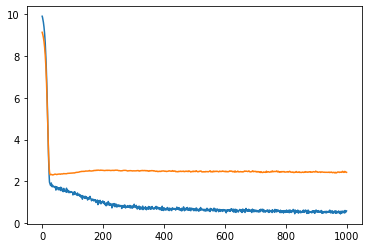

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fit.epoch,fit.history['loss'],label='simple_loss')
plt.plot(fit.epoch,fit.history['val_loss'],label='simple_val_loss')